### Se desarrolla el ETL de los datasets de restaurantes de Google

### Importacion de Librerias

Se importan las librerias que necesitaremos

In [1]:
import json 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creacion de los dataframes

In [2]:
data = []
archivos=['./Maps/Sitios/1.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df1 = pd.DataFrame(data)

In [3]:
data = []
archivos=['./Maps/Sitios/2.json','./Maps/Sitios/3.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df2 = pd.DataFrame(data)

In [4]:
data = []
archivos=['./Maps/Sitios/3.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df3 = pd.DataFrame(data)

In [5]:
data = []
archivos=['./Maps/Sitios/4.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df4= pd.DataFrame(data)

In [6]:
data = []
archivos=['./Maps/Sitios/5.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df5 = pd.DataFrame(data)

In [7]:
data = []
archivos=['./Maps/Sitios/6.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df6 = pd.DataFrame(data)

In [8]:
data = []
archivos=['./Maps/Sitios/7.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df7 = pd.DataFrame(data)

In [9]:
data = []
archivos=['./Maps/Sitios/8.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df8 = pd.DataFrame(data)

In [10]:
data = []
archivos=['./Maps/Sitios/9.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df9 = pd.DataFrame(data)

In [11]:
data = []
archivos=['./Maps/Sitios/10.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df10 = pd.DataFrame(data)

In [12]:
data = []
archivos=['./Maps/Sitios/11.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df11 = pd.DataFrame(data)

### Tratamiento de los Datos

Observamos las columnas que posee un dataframe

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [14]:
# Eliminamos columnas inncesarias
columnas=['description','state','relative_results','price','hours']
df1 = df1.drop(columnas,axis=1)
df2 = df2.drop(columnas,axis=1)
df3 = df3.drop(columnas,axis=1)
df4 = df4.drop(columnas,axis=1)
df5 = df5.drop(columnas,axis=1)
df6 = df6.drop(columnas,axis=1)
df7 = df7.drop(columnas,axis=1)
df8 = df8.drop(columnas,axis=1)
df9 = df9.drop(columnas,axis=1)
df10 = df10.drop(columnas,axis=1)
df11 = df11.drop(columnas,axis=1)

In [15]:
# Eliminamos las filas que poseen nulos en nuestros datos relevantes
columnas=['name','category','address']
df1 = df1.dropna(subset=columnas).reset_index(drop=True)
df2 = df2.dropna(subset=columnas).reset_index(drop=True)
df3 = df3.dropna(subset=columnas).reset_index(drop=True)
df4 = df4.dropna(subset=columnas).reset_index(drop=True)
df5 = df5.dropna(subset=columnas).reset_index(drop=True)
df6 = df6.dropna(subset=columnas).reset_index(drop=True)
df7 = df7.dropna(subset=columnas).reset_index(drop=True)
df8 = df8.dropna(subset=columnas).reset_index(drop=True)
df9 = df9.dropna(subset=columnas).reset_index(drop=True)
df10 = df10.dropna(subset=columnas).reset_index(drop=True)
df11 = df11.dropna(subset=columnas).reset_index(drop=True)

Se seleccionan algunas palabras relacionadas con ocio para realizar un primer filtro

In [16]:
# Añadimos las palabras elegidas a una lista y la filtramos desde el dataframe
palabras_clave = ['restaurant', 'cocktail','swimming','gym','fitness','diner','spa','campground','coffee','dance','music','game','movie','fish','hotel','museum','gallery','golf','club','nature','sports']
df_filtrado1 = df1[df1['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [17]:
df_filtrado2 = df2[df2['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [18]:
df_filtrado3 = df3[df3['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [19]:
df_filtrado4 = df4[df4['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [20]:
df_filtrado5 = df5[df5['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [21]:
df_filtrado6 = df6[df6['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [22]:
df_filtrado7 = df7[df7['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [23]:
df_filtrado8 = df8[df8['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [24]:
df_filtrado9 = df9[df9['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [25]:
df_filtrado10 = df10[df10['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

In [26]:
df_filtrado11 = df11[df11['category'].apply(lambda x: any(palabra in s.lower() for s in x for palabra in palabras_clave))].reset_index(drop=True)

Se unen todos los dataframes para crear un dataframe final

In [27]:
df_concat1 = pd.concat([df_filtrado1,df_filtrado2])
df_concat1 = df_concat1.drop_duplicates(subset='gmap_id')
df_concat2 = pd.concat([df_concat1,df_filtrado3])
df_concat2 = df_concat2.drop_duplicates(subset='gmap_id')
df_concat3 = pd.concat([df_concat2,df_filtrado4])
df_concat3 = df_concat3.drop_duplicates(subset='gmap_id')
df_concat4 = pd.concat([df_concat3,df_filtrado5])
df_concat4 = df_concat4.drop_duplicates(subset='gmap_id')
df_concat5 = pd.concat([df_concat4,df_filtrado6])
df_concat5 = df_concat5.drop_duplicates(subset='gmap_id')
df_concat6 = pd.concat([df_concat5,df_filtrado7])
df_concat6 = df_concat6.drop_duplicates(subset='gmap_id')
df_concat7 = pd.concat([df_concat6,df_filtrado8])
df_concat7 = df_concat7.drop_duplicates(subset='gmap_id')
df_concat8 = pd.concat([df_concat7,df_filtrado9])
df_concat8 = df_concat8.drop_duplicates(subset='gmap_id')
df_concat9 = pd.concat([df_concat8,df_filtrado10])
df_concat9 = df_concat9.drop_duplicates(subset='gmap_id')
df = pd.concat([df_concat9,df_filtrado11])
df = df.drop_duplicates(subset='gmap_id').reset_index(drop=True)

In [28]:
# Se estandariza la columna "category"
df['category'] = df['category'].apply(lambda lista: [palabra.title() for palabra in lista])

Elejimos palabras clave para empezar a segmentar los datos con los que se trabajará

In [4]:
ocio=['Restaurant','Spa','Gym','Nature','Hotel','Museum','Gallery','Sports','Music','Movie']

Iniciamos viendo la cantidad de veces que se repiten cada una dentro de las listas de "category"

In [5]:
# Inicializar un diccionario para contar cada palabra
conteo_palabras = {palabra: 0 for palabra in ocio}
# Contar la frecuencia de cada palabra en todas las listas
for palabra in ocio:
    conteo_ocurrencias = df['category'].apply(lambda lista: palabra in ' '.join(lista)).sum()
    conteo_palabras[palabra] = conteo_ocurrencias
# Mostrar el resultado
for palabra, conteo in conteo_palabras.items():
    print(f"{palabra}: {conteo} veces")

Restaurant: 209900 veces
Spa: 33122 veces
Gym: 24431 veces
Nature: 3117 veces
Hotel: 7610 veces
Museum: 8901 veces
Gallery: 8548 veces
Sports: 26875 veces
Music: 10224 veces
Movie: 7120 veces


C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

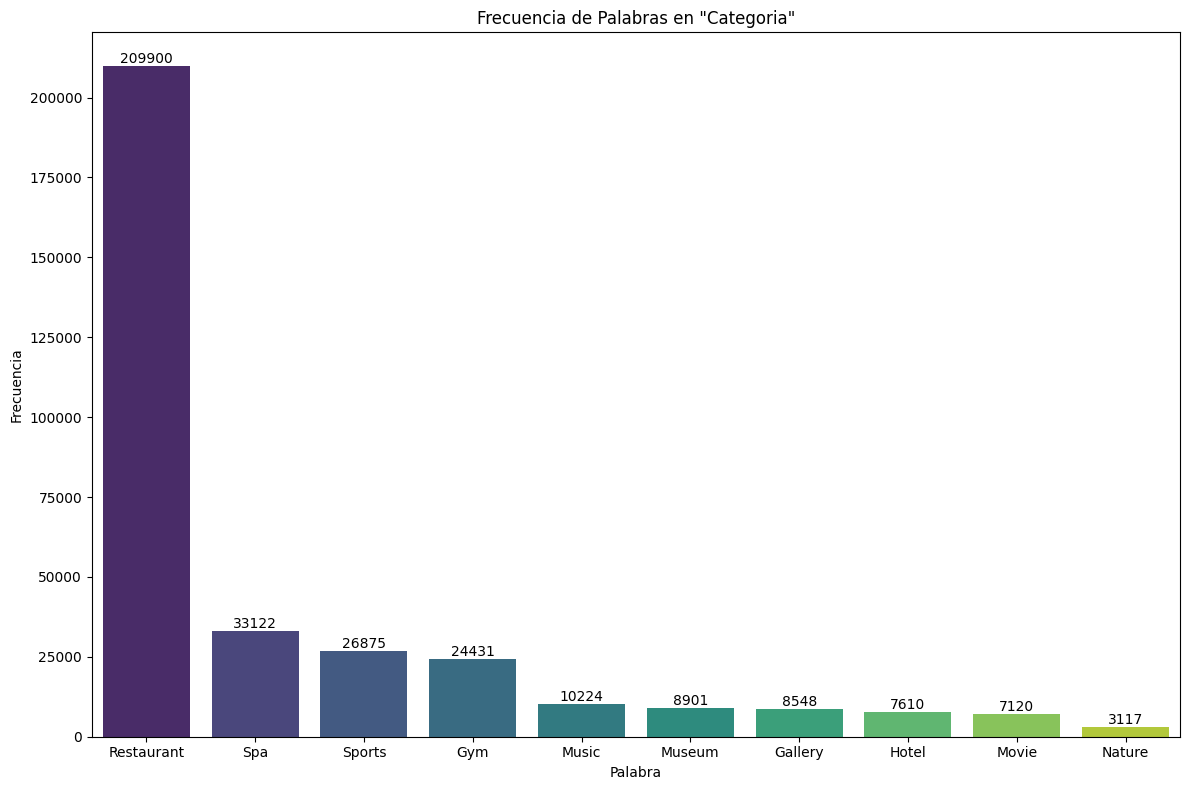

In [6]:
# Inicializar un diccionario para contar cada palabra
conteo_palabras = {palabra: 0 for palabra in ocio}

# Contar la frecuencia de cada palabra en todas las listas
for palabra in ocio:
    conteo_ocurrencias = df['category'].apply(lambda lista: palabra in ' '.join(lista)).sum()
    conteo_palabras[palabra] = conteo_ocurrencias

# Convertir el diccionario a un DataFrame
df_conteo = pd.DataFrame(list(conteo_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar los valores en forma decreciente
df_conteo = df_conteo.sort_values(by='Frecuencia', ascending=False)

# Tamaño personalizado de la figura
plt.figure(figsize=(12, 8))

# Graficar con seaborn
sns.barplot(x='Palabra', y='Frecuencia', data=df_conteo, palette='viridis')
plt.xlabel('Palabra')
plt.xticks(rotation='horizontal')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras en "Categoria"')

# Mostrar la cantidad de veces que se repiten cada palabra en la gráfica
for index, value in enumerate(df_conteo['Frecuencia']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Ajuste adicional para evitar recortes
plt.tight_layout()

# Guardar la imagen como JPG
plt.savefig('grafico_ocio.jpg')

# Mostrar el gráfico
plt.show()

Analizaremos la cantidad de reviews que posee cada rubro

In [7]:
# Inicializar un diccionario para almacenar la cantidad total de revisiones por palabra
total_reviews_por_palabra = {palabra: 0 for palabra in ocio}

# Iterar sobre cada palabra y sumar las revisiones correspondientes
for palabra in ocio:
    df[palabra] = df['category'].apply(lambda lista: palabra in ' '.join(lista))
    total_reviews_por_palabra[palabra] = df[df[palabra]]['num_of_reviews'].sum()

# Mostrar los resultados
for palabra, total_reviews in total_reviews_por_palabra.items():
    print(f"{palabra}: {total_reviews} revisiones")

Restaurant: 23753696 revisiones
Spa: 1855252 revisiones
Gym: 1106882 revisiones
Nature: 112518 revisiones
Hotel: 268695 revisiones
Museum: 467144 revisiones
Gallery: 213204 revisiones
Sports: 1990580 revisiones
Music: 950092 revisiones
Movie: 476780 revisiones


C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

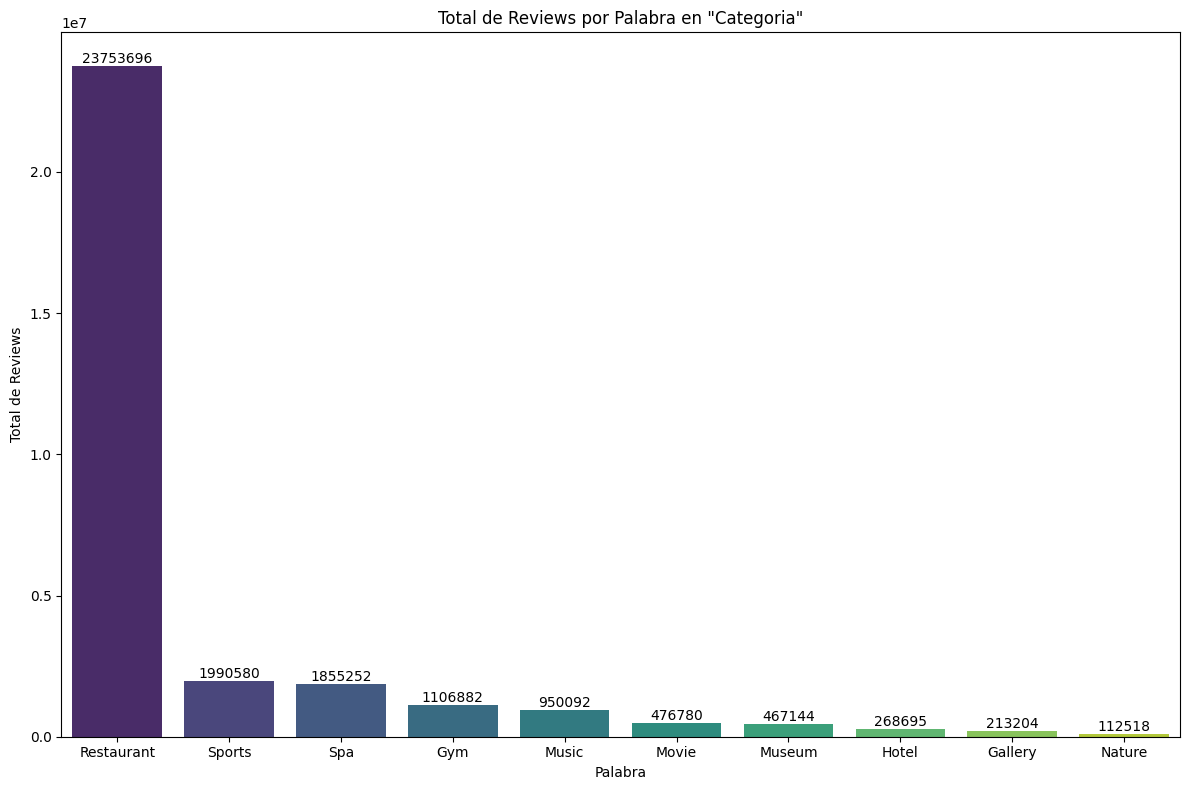

In [8]:
# Inicializar un diccionario para almacenar la cantidad total de revisiones por palabra
total_reviews_por_palabra = {palabra: 0 for palabra in ocio}

# Iterar sobre cada palabra y sumar las revisiones correspondientes
for palabra in ocio:
    df[palabra] = df['category'].apply(lambda lista: palabra in ' '.join(lista))
    total_reviews_por_palabra[palabra] = df[df[palabra]]['num_of_reviews'].sum()

# Convertir el diccionario a un DataFrame
df_conteo = pd.DataFrame(list(total_reviews_por_palabra.items()), columns=['Palabra', 'Total_Reviews'])

# Ordenar los valores en forma decreciente
df_conteo = df_conteo.sort_values(by='Total_Reviews', ascending=False)

# Tamaño personalizado de la figura
plt.figure(figsize=(12, 8))

# Graficar con seaborn
sns.barplot(x='Palabra', y='Total_Reviews', data=df_conteo, palette='viridis')
plt.xlabel('Palabra')
plt.xticks(rotation='horizontal')
plt.ylabel('Total de Reviews')
plt.title('Total de Reviews por Palabra en "Categoria"')

# Mostrar la cantidad total de revisiones en la gráfica
for index, value in enumerate(df_conteo['Total_Reviews']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Ajuste adicional para evitar recortes
plt.tight_layout()

# Guardar la imagen como JPG
plt.savefig('grafico_ocio_reviews.jpg')

# Mostrar el gráfico
plt.show()

Se observa que que la categoría "Restaurant" es de la que mayor cantidad de datos y reviews se posee.           
Es por ello que se filtrará un nuevo dataframe pero solo con dicha categoria para un posterior análisis.

In [9]:
# Filtrar el DataFrame para conservar solo las filas con subcadenas que contengan "Restaurant" en la categoría
df_restaurant = df[df['category'].apply(lambda lista: any('Restaurant' in categoria for categoria in lista))].reset_index(drop=True)
df_restaurant = df_restaurant.iloc[:, :-10]

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC,url
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean Restaurant],4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De...",https://www.google.com/maps/place//data=!4m2!3...
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,[Restaurant],4.5,18,"{'Service options': ['Outdoor seating', 'Curbs...",https://www.google.com/maps/place//data=!4m2!3...
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,41.616079,-93.865487,"[Bakery, Health Food Restaurant]",4.7,21,{'Service options': ['Delivery']},https://www.google.com/maps/place//data=!4m2!3...
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,[Restaurant],4.0,8,"{'Service options': ['Delivery'], 'Amenities':...",https://www.google.com/maps/place//data=!4m2!3...
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,[Restaurant],4.4,18,"{'Service options': ['Outdoor seating', 'Takeo...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...
209895,"Simple Simon's Pizza - Vilonia, AR","Simple Simon's Pizza - Vilonia, AR, 14 S Churc...",0x87d28d5aa640a9c5:0x3c9cc5d3a99de80c,35.081871,-92.207739,"[Pizza Takeout, Italian Restaurant, Pizza Rest...",4.5,38,"{'Service options': ['Takeout'], 'Popular for'...",https://www.google.com/maps/place//data=!4m2!3...
209896,Subpreme Grill,"Subpreme Grill, 15260 SW 280th St UNIT 111, Ho...",0x88d9dd6e78851851:0x849dcf273582261c,25.506121,-80.438215,"[Sandwich Shop, Fast Food Restaurant, Takeout ...",4.3,393,"{'Service options': ['Takeout'], 'Popular for'...",https://www.google.com/maps/place//data=!4m2!3...
209897,Dunkin',"Dunkin', 7000 Chester Ave, Philadelphia, PA 19142",0x89c6c4072624d2a9:0x4437b2d55e9a5811,39.923594,-75.245269,"[Coffee Shop, Bagel Shop, Bakery, Breakfast Re...",4.0,348,"{'Service options': ['Delivery', 'Drive-throug...",https://www.google.com/maps/place//data=!4m2!3...
209898,Munch,"Munch, 5285 Meadows Rd #188, Lake Oswego, OR 9...",0x54957330545fc915:0xd14f2cb33733fb2b,45.418568,-122.730475,"[Deli, Coffee Shop, Takeout Restaurant, Sandwi...",4.6,44,{'From the business': ['Identifies as women-le...,https://www.google.com/maps/place//data=!4m2!3...


Una vez seleccionado el rubro, analizaremos en que estado se encuentran cada una.

In [10]:
import us

def obtener_estado_desde_cadena(cadena):
    for estado in us.states.STATES:
        if estado.abbr in cadena or estado.name.lower() in cadena.lower():
            return estado
    return None

# Aplicar la función a cada valor de la columna 'address'
df_restaurant['estado_objeto'] = df_restaurant['address'].apply(obtener_estado_desde_cadena)

# Crear nuevas columnas 'state' y 'code' basadas en los resultados
df_restaurant['state'] = df_restaurant['estado_objeto'].apply(lambda estado: estado.name if estado else None)
df_restaurant['code'] = df_restaurant['estado_objeto'].apply(lambda estado: estado.abbr if estado else None)

# Eliminar la columna temporal 'estado_objeto'
df_restaurant = df_restaurant.drop('estado_objeto', axis=1)
df_restaurant

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC,url,state,code
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean Restaurant],4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De...",https://www.google.com/maps/place//data=!4m2!3...,California,CA
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,[Restaurant],4.5,18,"{'Service options': ['Outdoor seating', 'Curbs...",https://www.google.com/maps/place//data=!4m2!3...,California,CA
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,41.616079,-93.865487,"[Bakery, Health Food Restaurant]",4.7,21,{'Service options': ['Delivery']},https://www.google.com/maps/place//data=!4m2!3...,Iowa,IA
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,[Restaurant],4.0,8,"{'Service options': ['Delivery'], 'Amenities':...",https://www.google.com/maps/place//data=!4m2!3...,Pennsylvania,PA
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,[Restaurant],4.4,18,"{'Service options': ['Outdoor seating', 'Takeo...",https://www.google.com/maps/place//data=!4m2!3...,Hawaii,HI
...,...,...,...,...,...,...,...,...,...,...,...,...
209895,"Simple Simon's Pizza - Vilonia, AR","Simple Simon's Pizza - Vilonia, AR, 14 S Churc...",0x87d28d5aa640a9c5:0x3c9cc5d3a99de80c,35.081871,-92.207739,"[Pizza Takeout, Italian Restaurant, Pizza Rest...",4.5,38,"{'Service options': ['Takeout'], 'Popular for'...",https://www.google.com/maps/place//data=!4m2!3...,Arkansas,AR
209896,Subpreme Grill,"Subpreme Grill, 15260 SW 280th St UNIT 111, Ho...",0x88d9dd6e78851851:0x849dcf273582261c,25.506121,-80.438215,"[Sandwich Shop, Fast Food Restaurant, Takeout ...",4.3,393,"{'Service options': ['Takeout'], 'Popular for'...",https://www.google.com/maps/place//data=!4m2!3...,Florida,FL
209897,Dunkin',"Dunkin', 7000 Chester Ave, Philadelphia, PA 19142",0x89c6c4072624d2a9:0x4437b2d55e9a5811,39.923594,-75.245269,"[Coffee Shop, Bagel Shop, Bakery, Breakfast Re...",4.0,348,"{'Service options': ['Delivery', 'Drive-throug...",https://www.google.com/maps/place//data=!4m2!3...,Pennsylvania,PA
209898,Munch,"Munch, 5285 Meadows Rd #188, Lake Oswego, OR 9...",0x54957330545fc915:0xd14f2cb33733fb2b,45.418568,-122.730475,"[Deli, Coffee Shop, Takeout Restaurant, Sandwi...",4.6,44,{'From the business': ['Identifies as women-le...,https://www.google.com/maps/place//data=!4m2!3...,Oregon,OR


In [11]:
# Obtener la cantidad de veces que se repite cada valor en la columna 'state'
conteo_estados = df_restaurant['state'].value_counts()
# Mostrar el resultado
conteo_estados

state
California        27060
Texas             18932
New York          17097
Florida           13713
Pennsylvania       8291
Illinois           8130
New Jersey         7543
Georgia            6386
Ohio               5578
Virginia           5328
North Carolina     5297
Michigan           4869
Massachusetts      4835
Washington         4253
Maryland           3803
Tennessee          3754
Colorado           3701
Indiana            3581
Arizona            3363
Louisiana          3212
Alabama            3109
Wisconsin          3077
Connecticut        3067
Missouri           3026
South Carolina     2873
Oregon             2632
Minnesota          2611
Nebraska           2551
Arkansas           2419
Kentucky           2339
Oklahoma           2312
Iowa               2026
Kansas             1919
Nevada             1908
Mississippi        1844
Hawaii             1707
Utah               1599
Maine              1168
West Virginia      1047
Idaho              1007
New Mexico          982
New Hampsh

C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magsn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


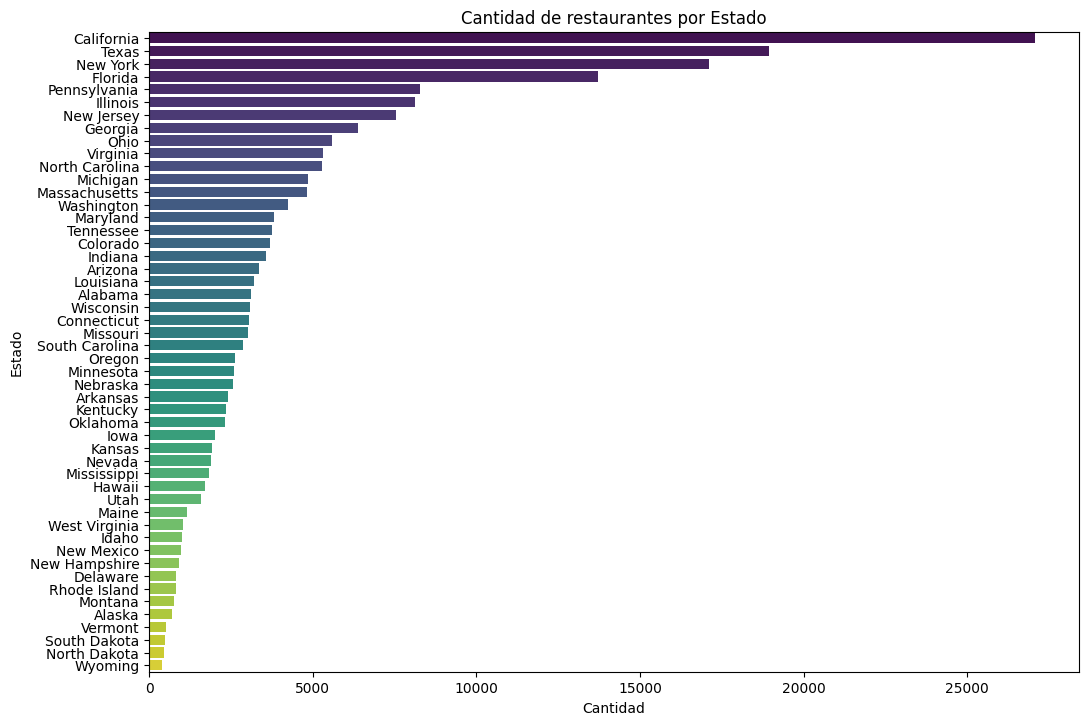

In [12]:
# Graficar en orden descendente con barras más separadas y etiquetas espaciadas
plt.figure(figsize=(12, 8))
sns.countplot(y='state', data=df_restaurant, order=df_restaurant['state'].value_counts().index, palette='viridis', linewidth=1.5)
plt.xlabel('Cantidad')
plt.ylabel('Estado')
plt.title('Cantidad de restaurantes por Estado')
# Ajustar la separación entre las etiquetas del eje y
plt.subplots_adjust(top=0.9, bottom=0.1)
# Guardar la imagen como JPG
plt.savefig('cantidad_restaurantes_por_estado.jpg')
plt.show()

In [13]:
# Obtener la cantidad de veces que se repite cada valor en la columna 'state'
conteo_estados = df_restaurant['state'].value_counts()
# Mostrar el resultado
conteo_estados.head(10)

state
California      27060
Texas           18932
New York        17097
Florida         13713
Pennsylvania     8291
Illinois         8130
New Jersey       7543
Georgia          6386
Ohio             5578
Virginia         5328
Name: count, dtype: int64

Los estados con mayor cantidad de Restaurants son: California, Texas, New York, Florida, Pennsylvania, Illinois, New Jersey, Georgia, Ohio y Virginia

Por razones de PIB,  poblacion e ingreso percapita de los Estados Unidos, nos quedaremos para realizar su análisis con los estados de: California, Florida, Illinois, Pensylvania, New Jersey, Indiana, Tennessee y Arizona.

In [20]:
# Se crea el dataframe con los estados elejidos
estados = ['California', 'Florida', 'Illinois','Pensylvania', 'New Jersey', 'Indiana', 'Tennessee','Arizona']
df_restaurant = df_restaurant[df_restaurant['state'].isin(estados)].reset_index(drop=True)
df_restaurant

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC,url,state,code
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean Restaurant],4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De...",https://www.google.com/maps/place//data=!4m2!3...,California,CA
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,[Restaurant],4.5,18,"{'Service options': ['Outdoor seating', 'Curbs...",https://www.google.com/maps/place//data=!4m2!3...,California,CA
2,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,[Restaurant],5.0,1,"{'Service options': ['Dine-in', 'Delivery'], '...",https://www.google.com/maps/place//data=!4m2!3...,Florida,FL
3,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,27.867489,-82.702971,[Buffet Restaurant],5.0,2,"{'Service options': ['Delivery'], 'Accessibili...",https://www.google.com/maps/place//data=!4m2!3...,Florida,FL
4,TACOS LA CABANA,"TACOS LA CABANA, 2015 22nd Ave, Oakland, CA 94606",0x808f879f35b5088b:0xe3541cec7a95bd88,37.789076,-122.233884,[Taco Restaurant],5.0,2,"{'Service options': ['Takeout', 'Dine-in'], 'P...",https://www.google.com/maps/place//data=!4m2!3...,California,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
67139,Mac's BBQ,"Mac's BBQ, 630 Hollywood Dr, Jackson, TN 38301",0x887ea119d9e8fd09:0x17df17c499c93f0d,35.622428,-88.835994,[Barbecue Restaurant],4.5,58,"{'Service options': ['Takeout', 'Delivery'], '...",https://www.google.com/maps/place//data=!4m2!3...,Tennessee,TN
67140,Jackson Pizza,"Jackson Pizza, 81 Cassville Rd, Jackson Townsh...",0x89c17b3b65b4680d:0x40a43d960a97a0,40.109785,-74.387818,"[Pizza Restaurant, Italian Restaurant, Pizza D...",4.5,28,"{'Service options': ['Curbside pickup', 'Deliv...",https://www.google.com/maps/place//data=!4m2!3...,New Jersey,NJ
67141,Royal Bavarian Schnitzel Haus,"Royal Bavarian Schnitzel Haus, 1085 NE 79th St...",0x88d9b3cd3f274101:0x64335c60e4e3065e,25.848295,-80.174799,"[German Restaurant, Bar, Restaurant]",4.3,144,"{'Service options': ['Delivery'], 'Amenities':...",https://www.google.com/maps/place//data=!4m2!3...,Florida,FL
67142,Panheads Pizzeria,"Panheads Pizzeria, 4085 S Ridgewood Ave, Port ...",0x88e6d78a11694343:0xaed512a21b391dcd,29.142263,-80.986379,[Pizza Restaurant],4.4,98,"{'Service options': ['Delivery'], 'Amenities':...",https://www.google.com/maps/place//data=!4m2!3...,Florida,FL


### To Parquet

In [ ]:
# Se guarda en formato parquet
df_restaurant.to_parquet('restaurant.parquet', index=False, engine='pyarrow')

## Dataframe de Reviews

Se cargará un json para ver su formato y realizar un primer análisis

In [ ]:
data = []
archivos=['./Maps/Estados/review-Arizona/1.json']
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
                data.append(json.loads(line))
df = pd.DataFrame(data)
df

In [ ]:
# Eliminamos la columna "pics" y estandarizamos la columna "name"
df['name'] = df['name'].str.title()
df=df.drop(['pics'],axis=1)

In [ ]:
df.info()

In [ ]:
# Añadimos más bibliotecas
from datetime import datetime
# Se crea la función para convertir marca de tiempo a fecha
def convertir_a_fecha(timestamp_ms):
    timestamp_seconds = timestamp_ms / 1000
    fecha = datetime.utcfromtimestamp(timestamp_seconds).date()
    return fecha

Ahora cargaremos todos los dataframes

In [ ]:
data = []
archivos = ['./Maps/Estados/review-Arizona/{}.json'.format(i) for i in range(1, 15)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_arizona = pd.DataFrame(data)
# Modificaciones adicionales
df_arizona['name'] = df_arizona['name'].str.title()
df_arizona = df_arizona.drop(['pics'], axis=1)
df_arizona['time'] = df_arizona['time'].apply(convertir_a_fecha)
# Guardar en formato Parquet
df_arizona.to_parquet('reviews_arizona.parquet', index=False, engine='pyarrow')

In [ ]:
data = []
archivos = ['./Maps/Estados/review-California/{}.json'.format(i) for i in range(1, 19)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_california = pd.DataFrame(data)
df_california['name'] = df_california['name'].str.title()
df_california=df_california.drop(['pics'],axis=1)
df_california['time'] = df_california['time'].apply(convertir_a_fecha)
df_california.to_parquet('reviews_california.parquet', index=False, engine='pyarrow')

In [ ]:
data = []
archivos = ['./Maps/Estados/review-Florida/{}.json'.format(i) for i in range(1, 20)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_florida = pd.DataFrame(data)
df_florida['name'] = df_florida['name'].str.title()
df_florida=df_florida.drop(['pics'],axis=1)
df_florida['time'] = df_florida['time'].apply(convertir_a_fecha)
df_florida.to_parquet('reviews_florida.parquet', index=False, engine='pyarrow')

In [ ]:
data = []
archivos = ['./Maps/Estados/review-Illinois/{}.json'.format(i) for i in range(1, 15)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_illinois = pd.DataFrame(data)
df_illinois['name'] = df_illinois['name'].str.title()
df_illinois=df_illinois.drop(['pics'],axis=1)
df_illinois['time'] = df_illinois['time'].apply(convertir_a_fecha)
df_illinois.to_parquet('reviews_illinois.parquet', index=False, engine='pyarrow')

In [ ]:
data = []
archivos = ['./Maps/Estados/review-Indiana/{}.json'.format(i) for i in range(1, 16)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_indiana = pd.DataFrame(data)
df_indiana['name'] = df_indiana['name'].str.title()
df_indiana=df_indiana.drop(['pics'],axis=1)
df_indiana['time'] = df_indiana['time'].apply(convertir_a_fecha)
df_indiana.to_parquet('reviews_indiana.parquet', index=False, engine='pyarrow')

In [ ]:
data = []
archivos = ['./Maps/Estados/review-New_Jersey/{}.json'.format(i) for i in range(1, 14)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_new_jersey = pd.DataFrame(data)
df_new_jersey['name'] = df_new_jersey['name'].str.title()
df_new_jersey=df_new_jersey.drop(['pics'],axis=1)
df_new_jersey['time'] = df_new_jersey['time'].apply(convertir_a_fecha)
df_new_jersey.to_parquet('reviews_new_jersey.parquet', index=False, engine='pyarrow')

In [ ]:
data = []
archivos = ['./Maps/Estados/review-Pennsylvania/{}.json'.format(i) for i in range(1, 17)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_pennsylvania = pd.DataFrame(data)
df_pennsylvania['name'] = df_pennsylvania['name'].str.title()
df_pennsylvania=df_pennsylvania.drop(['pics'],axis=1)
df_pennsylvania['time'] = df_pennsylvania['time'].apply(convertir_a_fecha)
df_pennsylvania.to_parquet('reviews_pennsylvania.parquet', index=False, engine='pyarrow')

In [ ]:
data = []
archivos = ['./Maps/Estados/review-Tennessee/{}.json'.format(i) for i in range(1, 13)]
for archivo in archivos:
    with open(archivo, 'r') as file:
        for line in file:
            data.append(json.loads(line))
df_tennessee = pd.DataFrame(data)
df_tennessee['name'] = df_tennessee['name'].str.title()
df_tennessee=df_tennessee.drop(['pics'],axis=1)
df_tennessee['time'] = df_tennessee['time'].apply(convertir_a_fecha)
df_tennessee.to_parquet('reviews_tennessee.parquet', index=False, engine='pyarrow')

Se crea un dataframe final uniendo todos los dataframes anteriores

In [ ]:
df_reviews = pd.concat([df_arizona,df_california])
df_reviews = pd.concat([df_reviews,df_florida])
df_reviews = pd.concat([df_reviews,df_illinois])
df_reviews = pd.concat([df_reviews,df_indiana])
df_reviews = pd.concat([df_reviews,df_new_jersey])
df_reviews = pd.concat([df_reviews,df_pennsylvania])
df_reviews = pd.concat([df_reviews,df_tennessee])

Filtramos para que todos los reviews del dataframe df_reviews estén referenciados a los restaurantes del df_restaurent. Esto lo hacemos mediante el gmap_id

In [ ]:
# Crear una lista con todos los valores únicos de la columna "gmap_id" en df_restaurant
gmap_ids_restaurant = df_restaurant['gmap_id'].unique().tolist()

# Verificar si cada gmap_id en la lista está presente en la columna "gmap_id" de df_reviews
present_in_reviews = df_reviews['gmap_id'].isin(gmap_ids_restaurant)

# Crear un nuevo DataFrame con las filas de df_reviews que tienen gmap_id presente en df_restaurant
df_reviews_filtered = df_reviews[present_in_reviews]

# Si deseas una lista de los gmap_id que están presentes en ambos DataFrames, puedes hacer lo siguiente
gmap_ids_present = df_reviews_filtered['gmap_id'].unique().tolist()

Se crean los dataframes finales con todos los filtros necesarios:
* todos los negocios seleccionados son del género ocio, y para ser más precisos son de la categoría "Restaurant".
* todos pertenecen a los estados de: Arizona, California, Florida, Illinois, Indiana, New Jersey, Pennsylvania y Tennessee.
* todas las reviews perteneces a los restaurantes de dichos estados.

In [ ]:
# Dataframes finales
df_reviews=df_reviews[df_reviews['gmap_id'].isin(gmap_ids_present)].reset_index(drop=True)
df_reviews.to_parquet('reviews.parquet', index=False, engine='pyarrow')
df_restaurant=df_restaurant[df_restaurant['gmap_id'].isin(gmap_ids_present)].reset_index(drop=True)
df_restaurant.to_parquet('restaurants.parquet', index=False, engine='pyarrow')